# Proyek Analisis Data: 

- **Nama**: Handika
- **Email**: handikasyam.dev@gmail.com
- **ID Dicoding**: handicca 

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana peningkatan pengguna registered dari tahun 2011 ke 2012?
- Pertanyaan 2: Bagaimana pengaruh musim, cuaca dan suhu terhadap jumlah penyewaan sepeda?
- Pertanyaan 3: Berapa persen dominasi pengguna registered dengan pengguna casual?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("./data/day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight**:
- Pada 10 data ini kolom season memiliki nilai 1 yang berarti data dimulai dari musim semi. kolom season (1=springer/musim semi, 2=summer/musim panas, 3=fall/musim gugur, 4=winter/musim dingin)
- Jumlah penyewaan (kolom cnt) meningkat pada awal bulan dalam 5 hari pertama.


In [3]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head(24)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight**:
- Cuaca cerah mendorong sedikit peningkatan aktivitas di siang hari, terutama di kalangan pengguna casual.
- Dalam 24 jam total penyewaan (kolom cnt) paling banyak terjadi pada jam 15

### Assessing Data

#### Menilai data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi:", day_df.duplicated().sum())

Jumlah duplikasi: 0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**
- Tidak ada missing value dan tidak ada duplikasi data.
- Terdapat kesalahan tipe data pada kolom dteday pada day_df yang seharusnya bertipe datetime
- kolom cnt/total penyewaan memiliki variasi yang besar antar hari yaitu min 22 dan max 8714
- pengguna registered mendominasi dibanding pengguna casual yaitu sekitar 81%. (3656 / 4504) x 100 

#### Menilai data hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi:", hour_df.duplicated().sum())

Jumlah duplikasi: 0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**
- Tidak ada missing value dan tidak ada duplikasi data.
- Terdapat kesalahan tipe data pada kolom dteday pada hour_df yang seharusnya bertipe datetime

### Cleaning Data

#### Membersihkan data day_df
- Memperbaiki tipe data `dteday` menjadi **datetime**

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

- Mengubah nama kolom `dteday`, `yr`, `mnth`, `hum`, dan `cnt` menjadi `date`, `year`, `month`, `humidity`, dan `total_count`

In [13]:
day_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hum": "humidity",
    "cnt": "total_count"
}, inplace=True)

day_df.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'total_count'],
      dtype='object')

#### Membersihkan data hour_df

- Memperbaiki tipe data `dteday` menjadi **datetime**

In [14]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

- Mengubah nama kolom `dteday`, `yr`, `mnth`, `hr`, `hum`, dan `cnt` menjadi `date`, `year`, `month`, `hour`, `humidity`, dan `total_count`

In [15]:
hour_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "hr": "hour",
    "mnth": "month",
    "hum": "humidity",
    "cnt": "total_count"
}, inplace=True)

hour_df.columns

Index(['instant', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

**Insight**
- Memperbaiki tipe data untuk kolom `dteday` pada **day_df** dan **hour_df** menjadi datetime
- Mengubah nama kolom `dteday`, `yr`, `mnth`, `hr`(pada hour_df), `hum`, `cnt` menjadi `date`, `year`, `month`, `hour`(pada hour_df), `humidity`, `total_count` untuk meningkatkan keterbacaan

## Exploratory Data Analysis (EDA)

### explore day_df

In [16]:
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight**

- Dataset mencakup dua tahun penuh dengan distribusi waktu lengkap. Sekitar 68% adalah hari kerja, sedangkan hari libur sangat sedikit
- Rata-rata total sewa 4500 per hari
- sekitar 81% pengguna adalah pengguna terdaftar/registered
- standar deviasi tinggi, jumlah penyewaan sangat dipengaruhi oleh faktor eksternal (musim, cuaca, hari kerja)

In [17]:
day_df.groupby("season")[["casual", "registered", "total_count"]].mean().round(0)


,casual,registered,total_count
season,,,
1,335.0,2269.0,2604.0
2,1106.0,3886.0,4992.0
3,1203.0,4442.0,5644.0
4,729.0,3999.0,4728.0


**Insight**
- Rata-rata penyewaan tertinggi berada di musim panas dan musim gugur

In [18]:
day_df.groupby("year")[["casual", "registered", "total_count"]].mean().round(0)

,casual,registered,total_count
year,,,
0,677.0,2728.0,3406.0
1,1018.0,4581.0,5600.0


**Insight**

- Pada tahun 2012 rata-rata pengguna casual dan terdaftar/regeistered naik

In [19]:
day_df.groupby("weathersit")[["casual", "registered", "total_count"]].mean().round(0)


,casual,registered,total_count
weathersit,,,
1,964.0,3913.0,4877.0
2,687.0,3349.0,4036.0
3,185.0,1618.0,1803.0


**Insight**
- Cuaca yang buruk menurunkan semua kategori pengguna
- pengguna casual lebih sensitif terhadap cuaca dibanding pengguna terdaftar

In [20]:
day_df.groupby("weekday")[["casual", "registered", "total_count"]].mean().round(0)


,casual,registered,total_count
weekday,,,
0,1338.0,2891.0,4229.0
1,674.0,3664.0,4338.0
2,556.0,3954.0,4511.0
3,551.0,3997.0,4549.0
4,591.0,4076.0,4667.0
5,752.0,3938.0,4690.0
6,1465.0,3085.0,4551.0


**Insight**

- puncak penyewaan bagi pengguna registered berada dihari kerja
- Pengguna casual meningkat diakhir pekan sabtu dan minggu

### Explore hour_df

In [21]:
hour_df.describe(include="all")

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight**

- Dalam 1 jam penyewaan tertinggi 977 pengguna sedangkan terendah 1 pengguna
- Nilai rata-rata weathersit = 1.42, sebagian besar jam memiliki cuaca cerah hingga berawan ringan.
- Suhu rata-rata sekitar 20°C (0.49 x 41), nyaman untuk aktivitas luar
- Suhu terasa (atemp) mirip suhu aktual (temp)
- kecepatan angin (windspeed) 0.19 cendrung lemah

In [22]:
hour_df.groupby("hour")[["total_count"]].mean().round(0)

,total_count
hour,
0,54.0
1,33.0
2,23.0
3,12.0
4,6.0
5,20.0
6,76.0
7,212.0
8,359.0


**Insight**
- Terlihat dua puncak utama pada jam 07–09 pagi dan 16–19 sore.

### Kesimpulan Akhir

Berdasarkan analisis terhadap day_df dan hour_df, dapat disimpulkan bahwa pola penyewaan sepeda sangat dipengaruhi oleh faktor temporal (jam & hari) dan faktor lingkungan (musim, suhu, dan cuaca). Pengguna terdaftar mendominasi aktivitas, terutama pada hari kerja dan jam sibuk, sedangkan pengguna kasual aktif pada akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana peningkatan pengguna registered dari tahun 2011 ke 2012

In [23]:
daily_df = day_df.copy()
daily_df["year"] = daily_df["year"].map({0: 2011, 1: 2012})
daily_df["month"] = daily_df["month"].map(
    {
        1: "Jan",
        2: "Feb",
        3: "Mar",
        4: "Apr",
        5: "May",
        6: "Jun",
        7: "Jul",
        8: "Aug",
        9: "Sep",
        10: "Oct",
        11: "Nov",
        12: "Dec",
    }
)
daily_df["season"] = daily_df["season"].map(
    {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
)
daily_df["weekday"] = daily_df["weekday"].map(
    {
        0: "Sunday",
        1: "Monday",
        2: "Tuesday",
        3: "Wednesday",
        4: "Thursday",
        5: "Friday",
        6: "Saturday",
    }
)
daily_df["holiday"] = daily_df["holiday"].map({0: "Non-Holiday", 1: "Holiday"})
daily_df["workingday"] = daily_df["workingday"].map(
    {0: "Non-Working Day", 1: "Working Day"}
)
daily_df["weathersit"] = daily_df["weathersit"].map(
    {1: "Clear", 2: "Cloudy/Mist", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"}
)

daily_df.head(10)

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Spring,2011,Jan,Non-Holiday,Saturday,Non-Working Day,Cloudy/Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,Non-Holiday,Sunday,Non-Working Day,Cloudy/Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,Non-Holiday,Monday,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,Non-Holiday,Tuesday,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,Non-Holiday,Wednesday,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,Spring,2011,Jan,Non-Holiday,Thursday,Working Day,Clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,Spring,2011,Jan,Non-Holiday,Friday,Working Day,Cloudy/Mist,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,Spring,2011,Jan,Non-Holiday,Saturday,Non-Working Day,Cloudy/Mist,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,Spring,2011,Jan,Non-Holiday,Sunday,Non-Working Day,Clear,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,Spring,2011,Jan,Non-Holiday,Monday,Working Day,Clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [24]:
# mengubah data harian menjadi bulanan berdasarkan total pengguna registered
monthly_registered = (
    daily_df.resample(rule="ME", on="date").agg({"registered": "sum"}).reset_index()
)

# menambahkan kolom tahun dan bulan
monthly_registered["year"] = monthly_registered["date"].dt.year
monthly_registered["month"] = monthly_registered["date"].dt.strftime("%b")

monthly_registered.head(24)

,date,registered,year,month
0,2011-01-31,35116,2011,Jan
1,2011-02-28,41973,2011,Feb
2,2011-03-31,51219,2011,Mar
3,2011-04-30,72524,2011,Apr
4,2011-05-31,104771,2011,May
5,2011-06-30,112900,2011,Jun
6,2011-07-31,104889,2011,Jul
7,2011-08-31,107849,2011,Aug
8,2011-09-30,100873,2011,Sep
9,2011-10-31,98289,2011,Oct


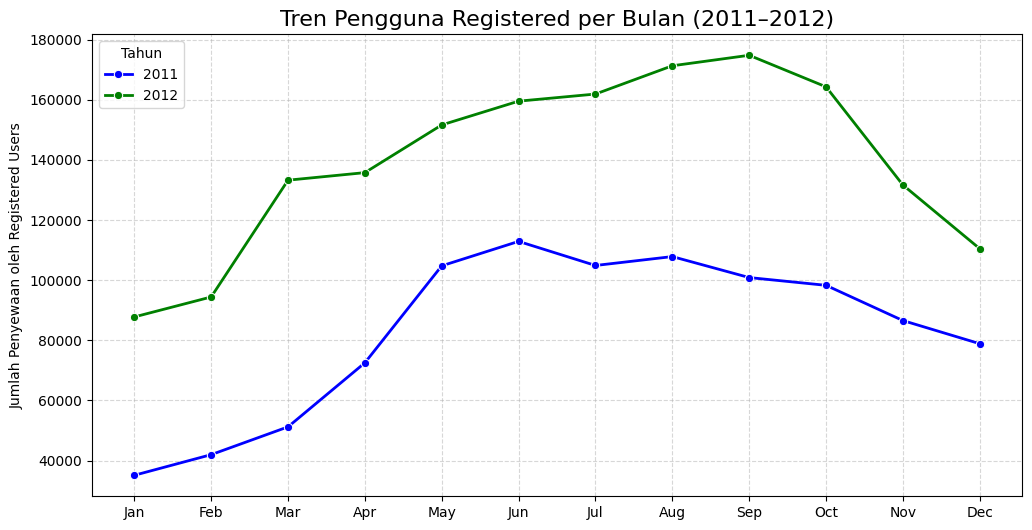

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_registered,
    x="month",
    y="registered",
    hue="year",
    marker="o",
    linewidth=2,
    palette=["blue", "green"],
)

plt.title("Tren Pengguna Registered per Bulan (2011–2012)", fontsize=16)
plt.xlabel(None)
plt.ylabel("Jumlah Penyewaan oleh Registered Users")
plt.legend(title="Tahun", loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

**Insight**

- terlihat adanya peningkatan signifikan jumlah pengguna registered dari tahun 2011 ke 2012
- pola musiman masih terlihat: aktivitas meningkat saat musim panas dan gugur (sekitar Mei–Oktober), dan menurun di musim dingin (Desember–Februari)
- pada tahun 2012, hampir setiap bulan memiliki jumlah penyewaan lebih tinggi dibandingkan bulan yang sama di 2011

### Pertanyaan 2: Bagaimana pengaruh musim, cuaca dan suhu terhadap jumlah penyewaan sepeda?

In [26]:
season_avg = daily_df.groupby("season")["total_count"].mean().reset_index()
print(season_avg)

   season  total_count
0    Fall  5644.303191
1  Spring  2604.132597
2  Summer  4992.331522
3  Winter  4728.162921


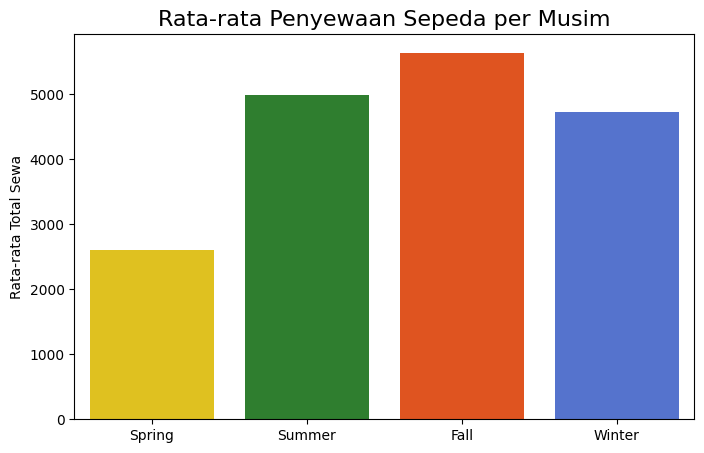

In [27]:
colors = ["orangered", "gold", "forestgreen", "royalblue"]
plt.figure(figsize=(8, 5))
sns.barplot(
    data=season_avg,
    x="season",
    y="total_count",
    hue="season",
    palette=colors,
    order=["Spring", "Summer", "Fall", "Winter"],
)
plt.title("Rata-rata Penyewaan Sepeda per Musim", fontsize=16)
plt.xlabel(None)
plt.ylabel("Rata-rata Total Sewa")
plt.show()

In [28]:
weather_avg = (
    daily_df.groupby("weathersit")["total_count"]
    .mean()
    .reindex(["Clear", "Cloudy/Mist", "Light Rain/Snow", "Heavy Rain/Snow"])
    .reset_index()
    .fillna(0)
)
print(weather_avg)

        weathersit  total_count
0            Clear  4876.786177
1      Cloudy/Mist  4035.862348
2  Light Rain/Snow  1803.285714
3  Heavy Rain/Snow     0.000000


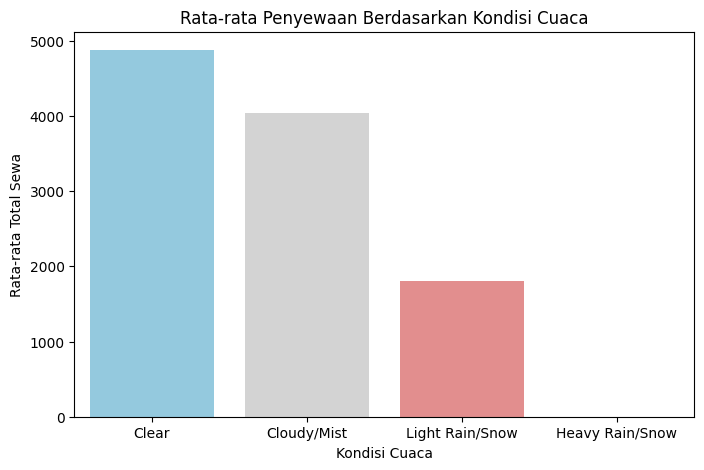

In [29]:
colors = ["skyblue", "lightgrey", "lightcoral", "slateblue"]
plt.figure(figsize=(8, 5))
sns.barplot(
    data=weather_avg, x="weathersit", y="total_count", hue="weathersit", palette=colors
)
plt.title("Rata-rata Penyewaan Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Total Sewa")
plt.show()

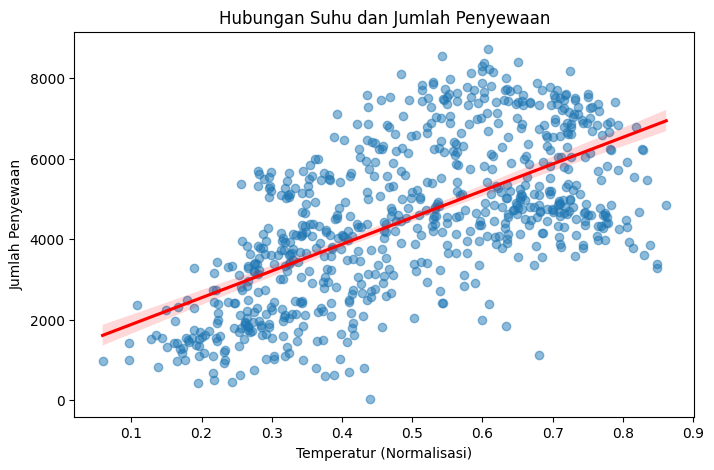

In [30]:
plt.figure(figsize=(8, 5))
sns.regplot(
    data=daily_df,
    x="temp",
    y="total_count",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"},
)
plt.title("Hubungan Suhu dan Jumlah Penyewaan")
plt.xlabel("Temperatur (Normalisasi)")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight**

- Musim panas (Summer) dan gugur (Fall) menunjukkan rata-rata penyewaan tertinggi, sedangkan musim semi (spring) paling rendah. Ini menunjukkan bahwa suhu dan kondisi cuaca merupakan faktor utama yang menentukan tingkat aktivitas bersepeda.
- Cuaca cerah atau berawan ringan mendukung penyewaan tertinggi. Saat hujan atau salju, penyewaan turun drastis karena kondisi jalan tidak aman.

### Pertanyaan 3: Berapa persen dominasi pengguna registered dengan pengguna casual?

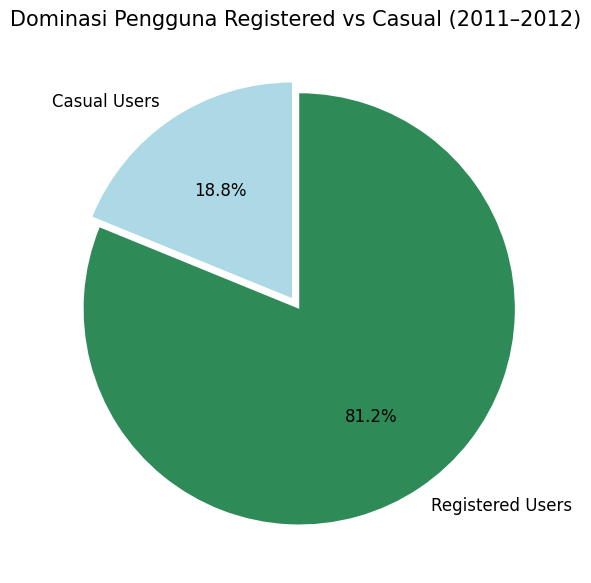

In [31]:
# Menghitung total pengguna berdasarkan tipe
user_total = daily_df[["casual", "registered"]].sum()

plt.figure(figsize=(7, 7))
colors = ["lightblue", "seagreen"]
plt.pie(
    user_total,
    labels=["Casual Users", "Registered Users"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=(0.03, 0.03),
    textprops={"fontsize": 12},
)

plt.title("Dominasi Pengguna Registered vs Casual (2011–2012)", fontsize=15)
plt.show()


**Insight**

- Pengguna registered mendominasi selama periode 2011-2012 yaitu sekita 81.2% dan pengguna casual 18.8%

## Analisis Lanjutan (Opsional)

Menggunakan teknik clustering manual grouping

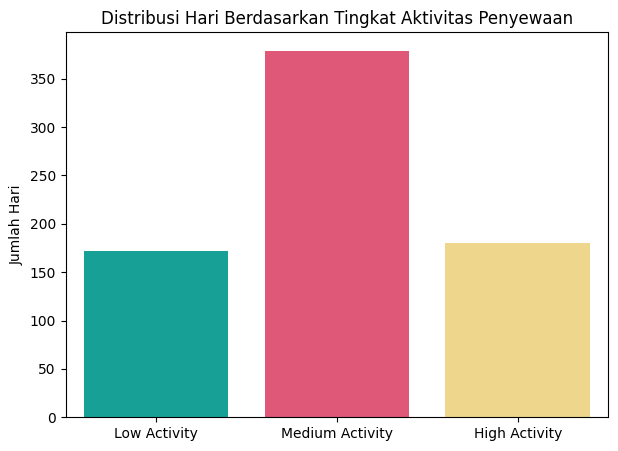

In [32]:

def group_activity(x):
    """
    Mengelompokkan tingkat aktivitas berdasarkan total penyewaan harian.
    """
    if x < 3000:
        return "Low Activity"
    elif 3000 <= x < 6000:
        return "Medium Activity"
    else:
        return "High Activity"


daily_df["activity_level"] = daily_df["total_count"].apply(group_activity)

colors = ["#00B8A9", "#F6416C", "#FFDE7D"]
plt.figure(figsize=(7, 5))
sns.countplot(
    data=daily_df,
    x="activity_level",
    palette=colors,
    hue="activity_level",
    order=["Low Activity", "Medium Activity", "High Activity"],
)
plt.title("Distribusi Hari Berdasarkan Tingkat Aktivitas Penyewaan")
plt.xlabel(None)
plt.ylabel("Jumlah Hari")
plt.show()

Berdasarkan visualisasi di atas, terlihat bahwa sebagian besar hari termasuk dalam kategori Medium Activity dengan jumlah sekitar lebih dari separuh total hari dalam periode pengamatan.
Hal ini menunjukkan bahwa aktivitas penyewaan sepeda secara umum berada pada tingkat sedang dan stabil.

## Conclusion

- **Conclusion pertanyaan 1**: Berdasarkan hasil analisis tren penyewaan oleh pengguna registered dari tahun 2011 hingga 2012, dapat disimpulkan bahwa terjadi pertumbuhan signifikan dalam jumlah penyewaan. menunjukkan pertumbuhan pengguna tetap yang konsisten. Aktivitas tertinggi terjadi pada musim panas hingga gugur (Mei–Oktober).

- **Conslusion pertanyaan 2**: Berdasarkan hasil visualisasi, dapat disimpulkan bahwa musim dan kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Penyewaan meningkat tajam pada musim panas dan gugur, ketika suhu berada pada tingkat yang nyaman dan cuaca cenderung stabil. Sebaliknya, aktivitas penyewaan menurun pada musim semi dan musim dingin akibat suhu yang lebih rendah. Selain itu, cuaca cerah dan berawan ringan terbukti menjadi kondisi paling ideal untuk bersepeda, sedangkan curah hujan dan salju menghambat aktivitas penyewaan secara signifikan. Hal ini menegaskan bahwa faktor suhu dan cuaca merupakan penentu utama dalam pola penggunaan sepeda harian.

- **Conslusion pertanyaan 3**: Pengguna registered mendominasi aktivitas penyewaan sepeda selama periode 2011–2012 dengan persentase sekitar 81,2%, sedangkan pengguna casual hanya menyumbang sekitar 18,8%. Hal ini menunjukkan bahwa sebagian besar aktivitas penyewaan dilakukan oleh pengguna tetap (registered users) yang kemungkinan menggunakan sepeda sebagai sarana transportasi rutin, sementara pengguna casual lebih banyak memanfaatkan layanan untuk kebutuhan rekreasi atau penggunaan sesekali.

In [33]:
daily_df.to_csv("./dashboard/main_data.csv", index=False)